# Computer Vision - P4

### **Carefully read the file `README.md` as well as the following instructions before start coding.**

## Delivery

Up to **1 point out of 10** will be penalized if the following requirements are not fulfilled:

- Implemented code should be commented.

- The questions introduced in the exercises must be answered.

- Add title to the figures to explain what is displayed.

- Comments and answers need to be in **english**.

- The deliverable must be a file named **P4_Student1_Student2.zip** that includes:
    - The notebook P4_Student1_Student2.ipynb completed with the solutions to the exercises and their corresponding comments.

**Deadline (Campus Virtual): November 16th, 23:00 h** 

==============================================================================================
## Descriptors extraction for object detection, based on template matching, ORB, and HOG
==============================================================================================

The main topics of Laboratory 4 are:

**FirstPart: Template Matching and Image Descriptors**

    4.1) Euclidean distance and Normalized Cross-correlation for template matching

    4.2) HOG image descriptor for object (person) detection

**Second Part: Image matching**

    4.3) Recognition by correspondance, based on feature extraction (ORB)
    
In order to complete this practicum, the following concepts need to be understood: template matching, feature localization (Harris, Censure), feature descriptor (HOG,ORB, Sift) methods.

It is highly recommendable to structure the code in functions in order to reuse code for different tests and images and make it shorter and more readable. Specially the visualization commands should be encapsulated in separate functions.

# 3 ORB feature detector and binary descriptor

Let us consider the problem of feature extraction that contains two subproblems: 
- feature location, 
- image feature description.

Let us focus on ORB, an approximation of SIFT method, and analyse if ORB is  scale and rotation invariant, a property that is very important for real-time applications.

**Hint:** `ORB` is a function within the module `skimage.feature`
                             
**Help**: We suggest to have a look at the [ORB example](http://scikit-image.org/docs/dev/auto_examples/features_detection/plot_orb.html) how to compute the ORB descriptors and find the descriptors match. You can use the function match_descriptors from `skimage.feature` module in order to compute and show the similar detected descriptors of the given images. 

**3.1** Detect the censure in the image `starbucks4.jpg`. Analyze and discuss the effect of different values of the parameters in censure function.

It was found 96 keypoints


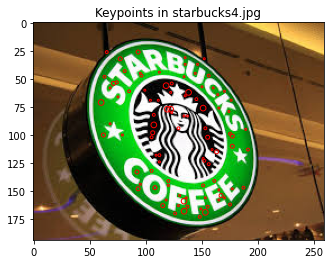

In [1]:
# Your solution here
from skimage.color import rgba2rgb, rgb2gray
import matplotlib.pyplot as plt
from skimage import io
from skimage.feature import ORB, CENSURE

starbucks4 = io.imread('images/starbucks4.jpg')

gray4 = rgb2gray(starbucks4)
detector = CENSURE()
detector.detect(gray4)
print('It was found', len(detector.keypoints), 'keypoints')

plt.imshow(starbucks4, cmap=plt.cm.gray)
plt.scatter(detector.keypoints[:, 1], detector.keypoints[:, 0],
              2 ** detector.scales, facecolors='none', edgecolors='r')
plt.title("Keypoints in starbucks4.jpg")
plt.show()

**3.2** Detect the correspondences between the model image `starbucks.jpg` with the scene image `starbucks4.jpg`. You can adapt the code from the [ORB example](http://scikit-image.org/docs/dev/auto_examples/features_detection/plot_orb.html) above. 

Define a function get_ORB implementing the algorithm in order to be able to apply it on different images. Comment the code in detail.

**Hint: If the function plot_matches() gives you an error you can use the plot_matches_aux() at the end of this file.**

Analyze and discuss the effect of different values of the parameter `max_ratio` in the match_descriptors function.


In [2]:
# Your solution here
from skimage.feature import match_descriptors, plot_matches
def get_ORB(model, scene):
    # Convert image to grayscale
    shape = model.shape
    if len(shape) == 3:
        if shape[2] == 3:
            model = rgb2gray(model)
        elif shape[2] == 4:
            model = rgb2gray(rgba2rgb(model))
    
    # Apply ORB to model
    descriptor_extractor = ORB() # default n_keypoints=500
    descriptor_extractor.detect_and_extract(model)
    keypoints1 = descriptor_extractor.keypoints
    descriptors1 = descriptor_extractor.descriptors
    
    results = []
    # Apply ORB to each image and match with model
    for img in scene:
        # Convert image to grayscale
        shape = img.shape
        if len(shape) == 3:
            if shape[2] == 3:
                img = rgb2gray(img)
            elif shape[2] == 4:
                img = rgb2gray(rgba2rgb(img))
        
        # Apply ORB to image
        descriptor_extractor.detect_and_extract(img)
        keypoints2 = descriptor_extractor.keypoints
        descriptors2 = descriptor_extractor.descriptors
            
        # Apply matches between model and an image
        matches = match_descriptors(descriptors1, descriptors2, cross_check=True)
        results.append([model, img, keypoints1, keypoints2, matches])
        
    return results

def plot_all_matches(images):
    # For each match
    for res in images:
        print("Similarity:", len(res[4])/5, '%') # Based on n_keypoints = 500
        # Show both images and plot its matches
        fig, ax = plt.subplots(1, 1, figsize=(12, 6))
        plot_matches(ax, res[0], res[1], res[2], res[3], res[4])
        ax.axis('off')
        ax.set_title("Starbucks model - Image")
        plt.show()

Similarity: 40.0 %


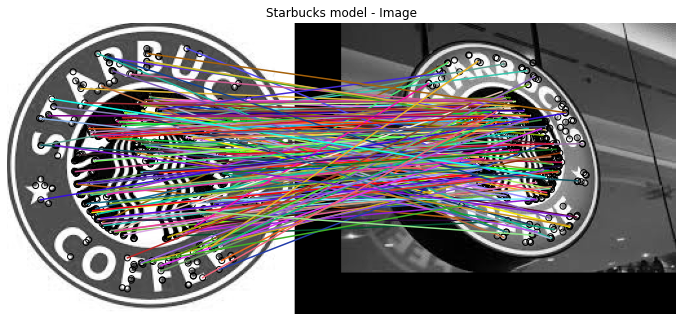

In [3]:
# Read both images
starbucks = io.imread('images/starbucks.jpg')
starbucks4 = io.imread('images/starbucks4.jpg')

# Call our defined function to get the ORB matches and plot all of them
result = get_ORB(starbucks, [starbucks4])
plot_all_matches(result)

Repeate the experiment comparing the `starbucks.jpg` image as a model, and showing its matches to all Starbucks images, sorting them based on their similarity to the model. Comment when does the algorithm work better. 

In [4]:
def number_of_matches(res):
    return len(res[4])

Similarity: 100.0 %


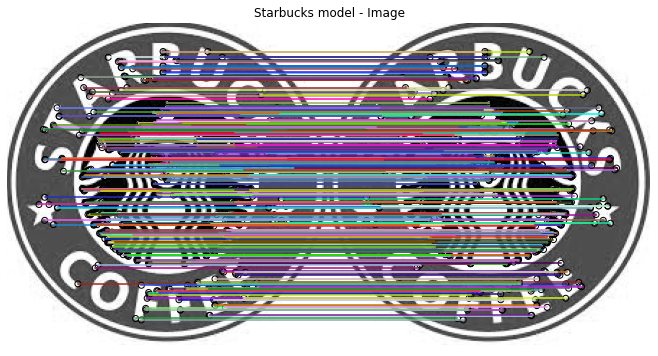

Similarity: 40.4 %


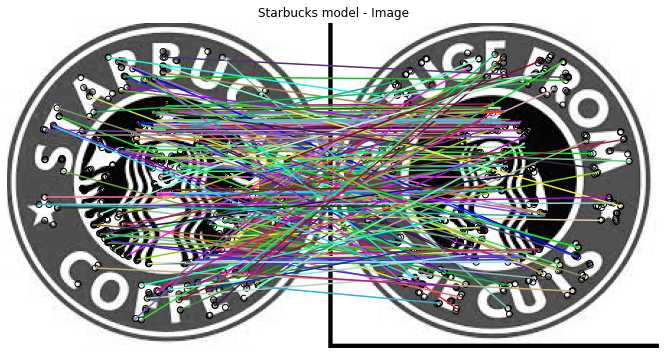

Similarity: 40.0 %


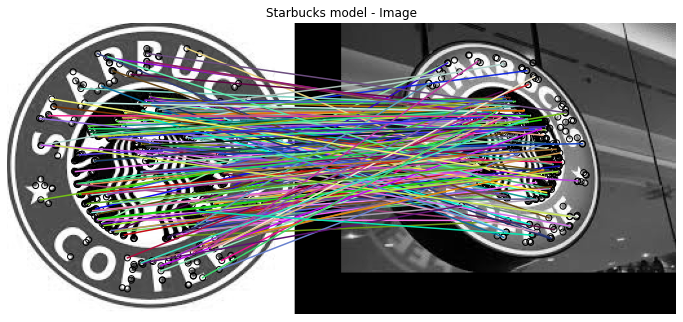

Similarity: 37.2 %


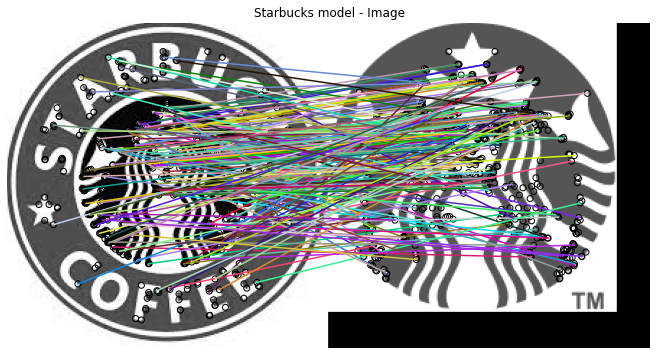

Similarity: 34.2 %


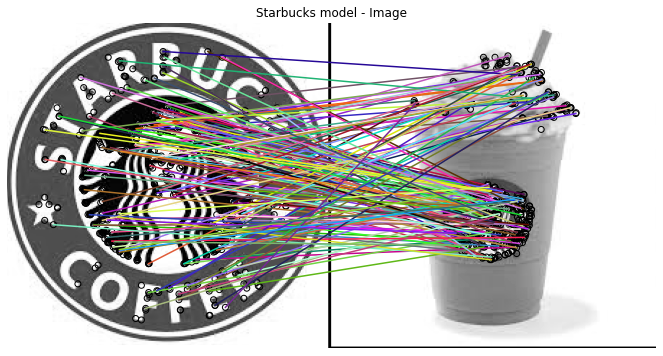

Similarity: 33.0 %


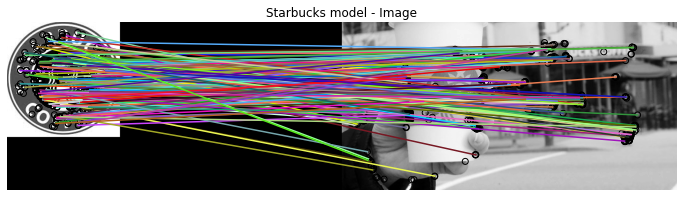

In [5]:
# Your solution here
# Read model and collection
model = io.imread('./images/starbucks.jpg')
collection = io.ImageCollection('images/starbucks*')

# Apply ORB to each scene of the collection
results = get_ORB(model, collection)

# Sorting them based on their similarity to the model
results.sort(key=number_of_matches, reverse=True)

# Plot them all
plot_all_matches(results)

**3.3** Repeate the experiment: 
- Changing the orientation of the model image by rotating it and comparing it with its original version. Help: you can use the rotate() function from skimage.transform 
- Change the scale and orientation of the scene image and compare it with the model image.

**Help:** To do so, you can use the function given below as example:

```
import transform as tf
rotationdegrees = 180
img_rotated = tf.rotate(image2transform, rotationdegrees)
```

or

```
tform = tf.AffineTransform(scale=(1.2, 1.2), translation=(0, -100))
img_transformed = tf.warp(image2transform, tform)
```

Similarity: 99.0 %


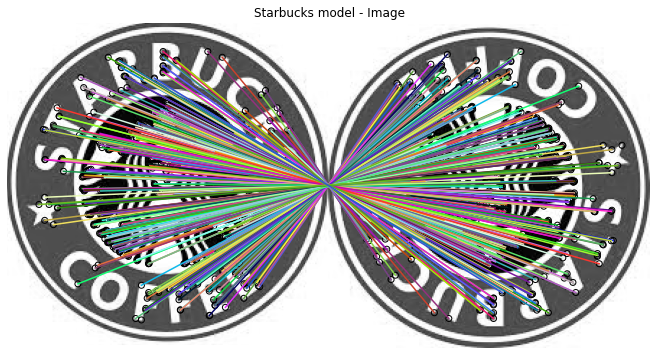

In [6]:
# Your solution here
# Change orientation at 180º degrees
from skimage import transform as tf
rotationdegrees = 180
img_rotated = tf.rotate(model, rotationdegrees)

# Call our defined function to get the ORB matches and plot all of them
result = get_ORB(model, [img_rotated])
plot_all_matches(result)

Similarity: 51.4 %


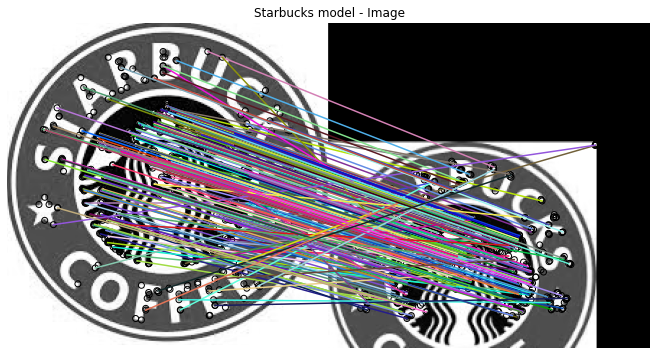

In [7]:
# Change the scale and translation
tform = tf.AffineTransform(scale=(1.2, 1.2), translation=(0, -100))
img_transformed = tf.warp(model, tform)
# Call our defined function to get the ORB matches and plot all of them
result = get_ORB(model, [img_transformed])
plot_all_matches(result)

**(Optional)** Repeat the experiment (3.1 to 3.3) with a new group of images. You could use Coca-Cola advertisements or from another famous brand, easily to find on internet.



In [ ]:
# Your solution here

**3.4** Analysis of the applied techniques and results

- What are the advantages of the ORB object detection with respect to the HOG and template object detector?

- What would happen if you analyse an image that does not contain the Starbucks logo? 

- Could you think of ways of defining a quality measure for the correspondance between two images? (no need of implementing it) 

**R:** The advantage oft the ORB object detector is that it's invariant to rotation and ilumination and it's partially invariant to scale. While HOG and template object detector isn't invariant to rotation. For this reason, we can consider that ORB is better object detector than HOG.

**R:** Still is possible to find matches, even if we compare with an image without the Starbucks logo. At this point, we need to evaluate if the match is good enough to be considered.

**R:** The first approach could be could count the number of matches between two images and divide it by the number of maximum keypoints setted, getting a percentage of similarity. <br>
Other approach could be establish a threshold to verify if each match is good enough to be considered. Then we could count the number of matches between two images, where more matches means more similar images. And finally, we could divide the number of matches by the number of matches found between the model and an identical image, getting a percentage of similarity.

### Appendix

In [ ]:
# In case the plot_matches() function gives you some problems, you can use the following one:

from skimage.util import img_as_float
import numpy as np

def plot_matches_aux(ax, image1, image2, keypoints1, keypoints2, matches,
                 keypoints_color='k', matches_color=None, only_matches=False):
    """Plot matched features.
    Parameters
    ----------
    ax : matplotlib.axes.Axes
        Matches and image are drawn in this ax.
    image1 : (N, M [, 3]) array
        First grayscale or color image.
    image2 : (N, M [, 3]) array
        Second grayscale or color image.
    keypoints1 : (K1, 2) array
        First keypoint coordinates as ``(row, col)``.
    keypoints2 : (K2, 2) array
        Second keypoint coordinates as ``(row, col)``.
    matches : (Q, 2) array
        Indices of corresponding matches in first and second set of
        descriptors, where ``matches[:, 0]`` denote the indices in the first
        and ``matches[:, 1]`` the indices in the second set of descriptors.
    keypoints_color : matplotlib color, optional
        Color for keypoint locations.
    matches_color : matplotlib color, optional
        Color for lines which connect keypoint matches. By default the
        color is chosen randomly.
    only_matches : bool, optional
        Whether to only plot matches and not plot the keypoint locations.
    """

    image1 = img_as_float(image1)
    image2 = img_as_float(image2)

    new_shape1 = list(image1.shape)
    new_shape2 = list(image2.shape)

    if image1.shape[0] < image2.shape[0]:
        new_shape1[0] = image2.shape[0]
    elif image1.shape[0] > image2.shape[0]:
        new_shape2[0] = image1.shape[0]

    if image1.shape[1] < image2.shape[1]:
        new_shape1[1] = image2.shape[1]
    elif image1.shape[1] > image2.shape[1]:
        new_shape2[1] = image1.shape[1]

    if new_shape1 != image1.shape:
        new_image1 = np.zeros(new_shape1, dtype=image1.dtype)
        new_image1[:image1.shape[0], :image1.shape[1]] = image1
        image1 = new_image1

    if new_shape2 != image2.shape:
        new_image2 = np.zeros(new_shape2, dtype=image2.dtype)
        new_image2[:image2.shape[0], :image2.shape[1]] = image2
        image2 = new_image2

    image = np.concatenate([image1, image2], axis=1)

    offset = image1.shape

    if not only_matches:
        ax.scatter(keypoints1[:, 1], keypoints1[:, 0],
                   facecolors='none', edgecolors=keypoints_color)
        ax.scatter(keypoints2[:, 1] + offset[1], keypoints2[:, 0],
                   facecolors='none', edgecolors=keypoints_color)

    ax.imshow(image, interpolation='nearest', cmap='gray')
    ax.axis((0, 2 * offset[1], offset[0], 0))

    for i in range(matches.shape[0]):
        idx1 = matches[i, 0]
        idx2 = matches[i, 1]

        if matches_color is None:
            color = np.random.rand(3)
        else:
            color = matches_color

        ax.plot((keypoints1[idx1, 1], keypoints2[idx2, 1] + offset[1]),
                (keypoints1[idx1, 0], keypoints2[idx2, 0]),
                '-', color=color)